In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-dataset/customer_dataset.csv


In [55]:
pd.set_option("display.max_columns", None)
df = pd.read_csv("/kaggle/input/customer-dataset/customer_dataset.csv")
df.head()

/tmp/ipykernel_33/2087371198.py:2: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/customer-dataset/customer_dataset.csv")


,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790,1.11,2.84
1,2,176875,15.74,33.83
2,3,6812,2.11,NaN
3,4,38542,7.82,10.73
4,5,48712,7.51,10.04


In [56]:
df.shape

(570000, 4)

In [57]:
df.describe()

,customer_id,average_monthly_basket_size
count,570000.000000,560714.000000
mean,279994.112840,13.295679
std,161638.615282,12.039603
min,1.000000,-19.000000
25%,140029.750000,3.800000
50%,279997.500000,9.790000
75%,419950.250000,17.490000
max,560000.000000,385.040000


In [58]:
df.dtypes

customer_id                          int64
average_monthly_spend               object
average_monthly_visit_frequency     object
average_monthly_basket_size        float64
dtype: object

In [59]:
numeric_column = pd.to_numeric(df['customer_id'], errors='coerce')

# Find the indices where NaN values occur (indicating non-numeric values)
non_numeric_indices = numeric_column[numeric_column.isna()].index

df.loc[non_numeric_indices, 'customer_id']

Series([], Name: customer_id, dtype: int64)

In [60]:
df.average_monthly_spend.isnull().sum()

9386

In [61]:
numeric_column = pd.to_numeric(df['average_monthly_spend'], errors='coerce')

# Find the indices where NaN values occur (indicating non-numeric values)
non_numeric_indices = numeric_column[numeric_column.isna()].index

print(df.loc[non_numeric_indices, 'average_monthly_spend'].shape)

df.loc[non_numeric_indices, 'average_monthly_spend']

(9387,)


26        nine hundred
80                 NaN
226                NaN
274                NaN
285                NaN
              ...     
559641             NaN
559698             NaN
559748             NaN
559903             NaN
559959             NaN
Name: average_monthly_spend, Length: 9387, dtype: object

In [62]:
df.loc[26, 'average_monthly_spend'] = 900

In [63]:
df['average_monthly_spend'] = pd.to_numeric(df['average_monthly_spend'], errors='coerce')

In [64]:
df.average_monthly_visit_frequency.isnull().sum()

9328

In [65]:
numeric_column = pd.to_numeric(df['average_monthly_visit_frequency'], errors='coerce')

# Find the indices where NaN values occur (indicating non-numeric values)
non_numeric_indices = numeric_column[numeric_column.isna()].index

print(df.loc[non_numeric_indices, 'average_monthly_visit_frequency'].shape)

df.loc[non_numeric_indices, 'average_monthly_visit_frequency'].sort_values().head(10)

(9333,)


323648     nine point five
322986       one point two
569999    three point four
326775          twenty two
324577                 two
24                     NaN
52                     NaN
158                    NaN
256                    NaN
267                    NaN
Name: average_monthly_visit_frequency, dtype: object

In [66]:
df.loc[323648, 'average_monthly_visit_frequency'] = 9.5
df.loc[322986, 'average_monthly_visit_frequency'] = 1.2
df.loc[569999, 'average_monthly_visit_frequency'] = 3.4
df.loc[326775, 'average_monthly_visit_frequency'] = 22
df.loc[324577, 'average_monthly_visit_frequency'] = 2

In [67]:
df['average_monthly_visit_frequency'] = pd.to_numeric(df['average_monthly_visit_frequency'], errors='coerce')

In [68]:
df.average_monthly_basket_size.isnull().sum()

9286

In [69]:
numeric_column = pd.to_numeric(df['average_monthly_basket_size'], errors='coerce')

# Find the indices where NaN values occur (indicating non-numeric values)
non_numeric_indices = numeric_column[numeric_column.isna()].index

print(df.loc[non_numeric_indices, 'average_monthly_basket_size'].shape)

df.loc[non_numeric_indices, 'average_monthly_basket_size'].sort_values().head(10)

(9286,)


2     NaN
7     NaN
53    NaN
354   NaN
358   NaN
391   NaN
396   NaN
403   NaN
458   NaN
473   NaN
Name: average_monthly_basket_size, dtype: float64

In [70]:
df['average_monthly_basket_size'] = pd.to_numeric(df['average_monthly_basket_size'], errors='coerce')

In [71]:
df.dtypes

customer_id                          int64
average_monthly_spend              float64
average_monthly_visit_frequency    float64
average_monthly_basket_size        float64
dtype: object

In [72]:
df.head()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790.0,1.11,2.84
1,2,176875.0,15.74,33.83
2,3,6812.0,2.11,NaN
3,4,38542.0,7.82,10.73
4,5,48712.0,7.51,10.04


In [73]:
df.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
count,570000.000000,5.606140e+05,560672.000000,560714.000000
mean,279994.112840,4.826518e+04,6.878535,13.295679
std,161638.615282,9.000251e+04,5.321111,12.039603
min,1.000000,-1.233400e+04,-20.000000,-19.000000
25%,140029.750000,1.050100e+04,2.390000,3.800000
50%,279997.500000,3.196900e+04,5.600000,9.790000
75%,419950.250000,8.543975e+04,9.850000,17.490000
max,560000.000000,4.833000e+07,432.740000,385.040000


In [74]:
df[df.average_monthly_spend < 0].value_counts().sum()

3

In [75]:
df[df.average_monthly_visit_frequency<0].value_counts().sum()

9

In [76]:
df[df.average_monthly_basket_size<0].value_counts().sum()

1

In [77]:
df = df[(df['average_monthly_spend'] >= 0) | (df['average_monthly_spend'].isna())]
df = df[(df['average_monthly_visit_frequency'] >= 0) | (df['average_monthly_visit_frequency'].isna())]
df = df[(df['average_monthly_basket_size'] >= 0) | (df['average_monthly_basket_size'].isna())]
df.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
count,569987.000000,5.606010e+05,560659.000000,560701.000000
mean,279995.171390,4.826541e+04,6.878767,13.295796
std,161636.674107,9.000337e+04,5.320723,12.039591
min,1.000000,0.000000e+00,0.000000,0.000000
25%,140032.500000,1.050100e+04,2.390000,3.800000
50%,279997.000000,3.196900e+04,5.600000,9.790000
75%,419949.500000,8.544000e+04,9.850000,17.490000
max,560000.000000,4.833000e+07,432.740000,385.040000


In [78]:
duplicates = df.duplicated(['customer_id'])
duplicates.sum()

9998

In [79]:
duplicate_customer_ids = df[df.duplicated('customer_id', keep=False)]['customer_id'].unique()
# Filter the DataFrame to only include rows with duplicate customer_ids
duplicates = df[df['customer_id'].isin(duplicate_customer_ids)]
# Group by customer_id and compare rows within each group to find discrepancies
discrepant_rows = []
# Iterate through each group
for customer_id, group in duplicates.groupby('customer_id'):
    # If there's more than one unique row in the group, add it to the result
    if len(group.drop_duplicates()) > 1:
        discrepant_rows.append(group)
# Concatenate the list of discrepant rows into a single DataFrame
discrepant_rows_df = pd.concat(discrepant_rows)
# Display the DataFrame with discrepancies
print(discrepant_rows_df)


        customer_id  average_monthly_spend  average_monthly_visit_frequency  \
244800       244801                 4225.0                             2.94   
569999       244801                 4225.0                             3.40   

        average_monthly_basket_size  
244800                         1.92  
569999                         1.92  


In [80]:
print(df.loc[244800, :])
print(df.loc[569999, :])

customer_id                        244801.00
average_monthly_spend                4225.00
average_monthly_visit_frequency         2.94
average_monthly_basket_size             1.92
Name: 244800, dtype: float64
customer_id                        244801.00
average_monthly_spend                4225.00
average_monthly_visit_frequency         3.40
average_monthly_basket_size             1.92
Name: 569999, dtype: float64


In [81]:
df.loc[244800, 'average_monthly_visit_frequency'] = discrepant_rows_df.average_monthly_visit_frequency.mean()

In [82]:
df = df.drop(569999)

In [83]:
duplicates = df.duplicated(['customer_id'])
duplicates.sum()

9997

In [84]:
# Identify all duplicated rows, including the first occurrence
all_duplicated_mask = df.duplicated(['customer_id'], keep=False)

# Create a DataFrame with duplicated rows
duplicated_rows = df[all_duplicated_mask].reset_index()

# Create a DataFrame with first occurrences
first_occurrences = df.drop_duplicates(['customer_id'], keep='first').reset_index()

# Merge the duplicated rows with the first occurrences based on the specified columns
merged = duplicated_rows.merge(first_occurrences, on=['customer_id'],
                               suffixes=('_duplicate', '_original'))

# Select and rename the relevant columns to create a clean mapping DataFrame
mapping_df = merged[['index_duplicate', 'index_original'] + 
                    [col for col in merged.columns if col.endswith('_duplicate')]]

# Display the mapping DataFrame
print(mapping_df)

       index_duplicate  index_original  index_duplicate  \
0                   15              15               15   
1                   49              49               49   
2                   98              98               98   
3                  128             128              128   
4                  177             177              177   
...                ...             ...              ...   
19989           569994          284117           569994   
19990           569995          341739           569995   
19991           569996          215275           569996   
19992           569997           11514           569997   
19993           569998          205259           569998   

       average_monthly_spend_duplicate  \
0                               4509.0   
1                              10798.0   
2                              10214.0   
3                              29004.0   
4                              82857.0   
...                                ... 

In [85]:
df_sorted = mapping_df.sort_values(by='index_original')
df_sorted.head(10)

,index_duplicate,index_original,index_duplicate,average_monthly_spend_duplicate,average_monthly_visit_frequency_duplicate,average_monthly_basket_size_duplicate
0,15,15,15,4509.0,1.95,2.64
12852,562855,15,562855,4509.0,1.95,2.64
1,49,49,49,10798.0,2.79,3.18
17072,567075,49,567075,10798.0,2.79,3.18
2,98,98,98,10214.0,2.87,1.33
17565,567568,98,567568,10214.0,2.87,1.33
3,128,128,128,29004.0,7.62,9.74
17848,567851,128,567851,29004.0,7.62,9.74
4,177,177,177,82857.0,18.65,19.66
19334,569339,177,569339,82857.0,18.65,19.66


In [86]:
# Drop duplicate rows based on 'customer_id', keeping only the first occurrence
df = df.drop_duplicates(subset='customer_id', keep='first')

In [87]:
df.duplicated(['customer_id']).sum()

0

In [88]:
df.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
count,559989.000000,5.506030e+05,550661.000000,550703.000000
mean,280002.073526,4.826654e+04,6.878587,13.294239
std,161656.270594,9.059068e+04,5.321429,12.039560
min,1.000000,0.000000e+00,0.000000,0.000000
25%,140004.000000,1.050000e+04,2.390000,3.800000
50%,280001.000000,3.197000e+04,5.600000,9.790000
75%,420000.000000,8.544300e+04,9.850000,17.490000
max,560000.000000,4.833000e+07,432.740000,385.040000


In [89]:
df.average_monthly_spend.isnull().sum()

9386

In [90]:
df.average_monthly_visit_frequency.isnull().sum()

9328

In [91]:
df.average_monthly_basket_size.isnull().sum()

9286

In [92]:
df.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
count,559989.000000,5.506030e+05,550661.000000,550703.000000
mean,280002.073526,4.826654e+04,6.878587,13.294239
std,161656.270594,9.059068e+04,5.321429,12.039560
min,1.000000,0.000000e+00,0.000000,0.000000
25%,140004.000000,1.050000e+04,2.390000,3.800000
50%,280001.000000,3.197000e+04,5.600000,9.790000
75%,420000.000000,8.544300e+04,9.850000,17.490000
max,560000.000000,4.833000e+07,432.740000,385.040000


In [93]:
mean_spend = df['average_monthly_spend'].median()
df['average_monthly_spend'].fillna(mean_spend, inplace=True)
df.average_monthly_spend.isnull().sum()

/tmp/ipykernel_33/334465473.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['average_monthly_spend'].fillna(mean_spend, inplace=True)


0

In [94]:
mean_spend = df['average_monthly_visit_frequency'].median()
df['average_monthly_visit_frequency'].fillna(mean_spend, inplace=True)
df.average_monthly_visit_frequency.isnull().sum()

/tmp/ipykernel_33/2059541351.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['average_monthly_visit_frequency'].fillna(mean_spend, inplace=True)


0

In [95]:
mean_spend = df['average_monthly_basket_size'].median()
df['average_monthly_basket_size'].fillna(mean_spend, inplace=True)
df.average_monthly_basket_size.isnull().sum()

/tmp/ipykernel_33/3497128560.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['average_monthly_basket_size'].fillna(mean_spend, inplace=True)


0

<Axes: ylabel='average_monthly_spend'>

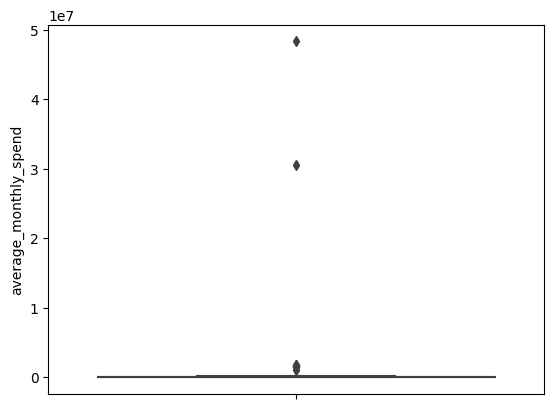

In [96]:
sns.boxplot(y=df['average_monthly_spend'])

<Axes: ylabel='average_monthly_visit_frequency'>

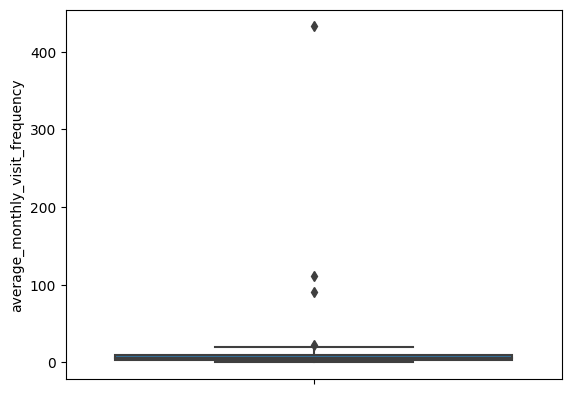

In [97]:
sns.boxplot(y=df['average_monthly_visit_frequency'])

<Axes: ylabel='average_monthly_basket_size'>

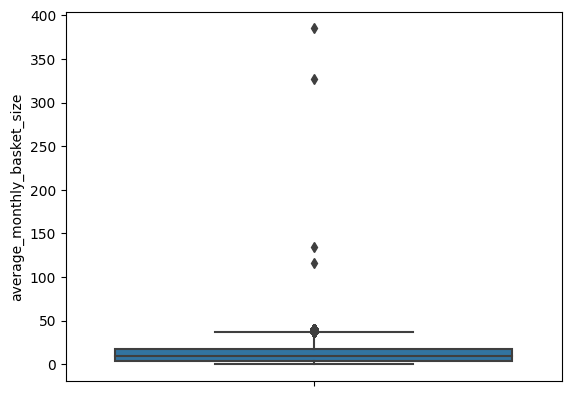

In [98]:
sns.boxplot(y=df['average_monthly_basket_size'])

In [99]:
# Identify outliers using the IQR method
Q1 = df['average_monthly_spend'].quantile(0.25)
Q3 = df['average_monthly_spend'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['average_monthly_spend'] >= lower_bound) & (df['average_monthly_spend'] <= upper_bound)]


<Axes: ylabel='average_monthly_spend'>

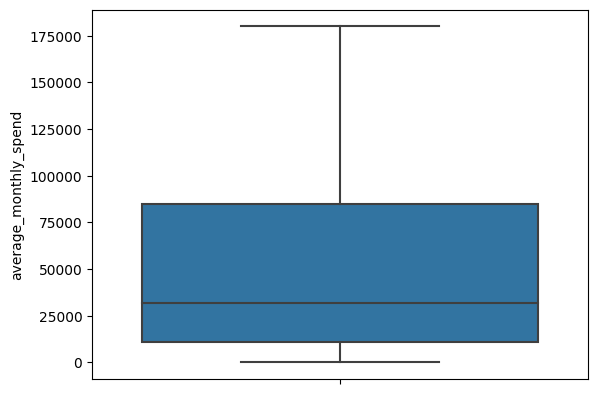

In [100]:
sns.boxplot(y=df['average_monthly_spend'])

In [101]:
# Identify outliers using the IQR method
Q1 = df['average_monthly_visit_frequency'].quantile(0.25)
Q3 = df['average_monthly_visit_frequency'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['average_monthly_visit_frequency'] >= lower_bound) & (df['average_monthly_visit_frequency'] <= upper_bound)]

<Axes: ylabel='average_monthly_visit_frequency'>

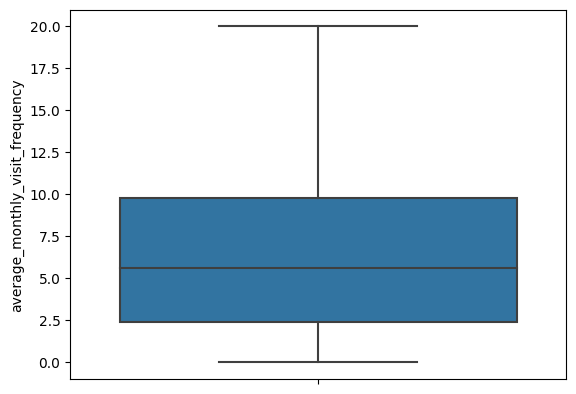

In [102]:
sns.boxplot(y=df['average_monthly_visit_frequency'])

In [103]:
# Calculate Q1 and Q3
Q1 = df['average_monthly_basket_size'].quantile(0.25)
Q3 = df['average_monthly_basket_size'].quantile(0.75)

# Define lower and upper bounds for Winsorizing
lower_bound = df['average_monthly_basket_size'].quantile(0.05)
upper_bound = df['average_monthly_basket_size'].quantile(0.95)

# Winsorize the data
df.loc[:, 'average_monthly_basket_size'] = df['average_monthly_basket_size'].clip(lower=lower_bound, upper=upper_bound)

<Axes: ylabel='average_monthly_basket_size'>

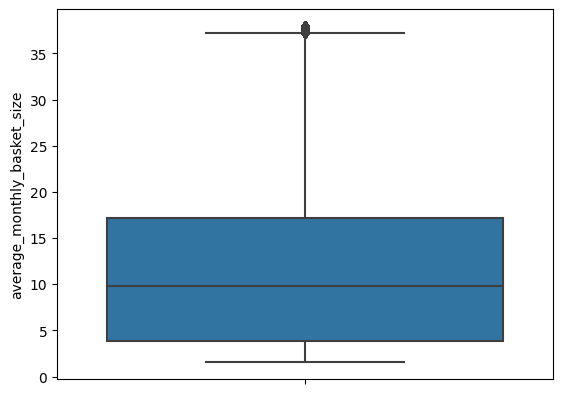

In [104]:
sns.boxplot(y=df['average_monthly_basket_size'])

In [105]:
df

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790.0,1.11,2.84
1,2,176875.0,15.74,33.83
2,3,6812.0,2.11,9.79
3,4,38542.0,7.82,10.73
4,5,48712.0,7.51,10.04
...,...,...,...,...
559997,559998,20502.0,7.02,9.23
559998,559999,3876.0,1.14,2.84
559999,560000,1556.0,2.32,3.48
568257,322880,14232.0,2.97,4.80


In [ ]:
output_file_path = 'cleaned_customer_data.csv'
df.to_csv(output_file_path, index=False)